# Converting the raw data ready to pocess, to csv file


### all the imports

In [4]:
import os
import pandas as pd


### getting all the files from the directory

In [5]:
def get_files():
    all_file_path = []
    """walk through the data dir to its sub-dirs and gets all the file with .review extension and return all the file_paths list"""
    # looping through the directory and the sub-directory
    for root, dirs, files in os.walk("data"):
        for file in files:
            # getting the file end with .review
            if file.endswith(".review"):
                # joining the file path with the actual full path of the file 
                file_path = os.path.join(root, file)
                # appending the file_path in the list 
                all_file_path.append(file_path)
                
    print(all_file_path)
    return all_file_path


In [7]:
# check
all_file_path = get_files()

['data/electronics/unlabeled.review', 'data/electronics/negative.review', 'data/electronics/positive.review', 'data/books/negative.review', 'data/books/positive.review', 'data/dvd/unlabeled.review', 'data/dvd/negative.review', 'data/dvd/positive.review', 'data/kitchen_&_housewares/unlabeled.review', 'data/kitchen_&_housewares/negative.review', 'data/kitchen_&_housewares/positive.review']


## categorized the files into list


In [8]:
def categorise_files(all_file_path):
    """get all file path and categorised the files into positive, negative and unlabeled review and return the file path list as tuple"""
    
    pos_review_f_path = []
    neg_review_f_path=[]
    unl_review_f_path = []
    
    for file in all_file_path:
        if "positive" in file:
            pos_review_f_path.append(file)
        elif "negative" in file:
            neg_review_f_path.append(file)
        else:
            unl_review_f_path.append(file)
    return pos_review_f_path, neg_review_f_path, unl_review_f_path

In [9]:
#check
categorise_files(all_file_path)

(['data/electronics/positive.review',
  'data/books/positive.review',
  'data/dvd/positive.review',
  'data/kitchen_&_housewares/positive.review'],
 ['data/electronics/negative.review',
  'data/books/negative.review',
  'data/dvd/negative.review',
  'data/kitchen_&_housewares/negative.review'],
 ['data/electronics/unlabeled.review',
  'data/dvd/unlabeled.review',
  'data/kitchen_&_housewares/unlabeled.review'])

## reading the files

In [10]:
def read_file(file_path):
    """reads the file from file path and return all lines in list"""
    with open(file_path) as file:
        items = file.readlines()
    return items

In [12]:
# check
items = read_file(all_file_path[0])

## making the list of review after reading the file

In [13]:
def build_review_list(items):
    """gets all the items, prepare a list of each review and returns the list of reviews"""
    reviews = []
    review = []
    for item in items:
        # remove \n from the item
        item = item[:-1]
        # get the file inside the review block not including the start and the end block
        if item != '<review>' and item != '</review':
            review.append(item)
            
        #  adding the review to the review list  
        if item == '</review>':
            reviews.append(review)
            review = []
    return reviews
   

In [15]:
#check
list_of_reviews = build_review_list(items)

### processing the review and making it ready to transfer into the dataframe

In [17]:
def process_review_list(list_of_reviews):
    """gets the list of reviews, seperate the headings and values and returns as list of dictionary"""
    dict_review_list = []
    previous_key = None
    
    #iterating through reviews
    for review in (list_of_reviews):
        dict_review = {}
        #iterating through a single review
        for num, item in enumerate(review):
            #eliminating null values
            if item != "":
                #getting and heading and assigning with corresponding values
                if item[0] =="<" and item[1] != "/":
                    dict_review[item] = review[num + 1]
                    previous_key = item
                #checking if any values are missing and reassigning them
                if item not in dict_review.values() and item[0] != '<':
                    dict_review[previous_key] += item
        # when a review is ready adding it to the list
        dict_review_list.append(dict_review)
    return dict_review_list

### converting the list of the dict into the datarame to convert into the csv file or process straightly


In [105]:
# creating the data from list of dict using lambda
to_dataframe = lambda list_of_dict: pd.DataFrame(list_of_dict)

### converting the dataframe into the csv file and saving into the directory


In [106]:
# convert and save to csv file
save_to_csv = lambda df, file_name: df.to_csv(file_name, index=False, encoding='utf-8')

### combining all the process to get single list of review of each category file found in directory

In [107]:

def convert_to_csv():
    dir = os.path.abspath(os.getcwd()) + "/data/csv_files/"
    
    file_name = ('positive_review', 'negative_review', 'unlabled_review')

    # get all the files
    all_file_path = get_files()
    
    #categorised the files in the list
    categories = categorise_files(all_file_path)
    
    #read all the files from each category:
    for num, category in enumerate(categories):
        
        # hold all the items of each category in one list 
        items_holder = []
        
        for file_path in category:
            # getting all the items
            items = read_file(file_path)
            items_holder.extend(items)
        
        # build the list of the items in one category
        list_of_reviews = build_review_list(items_holder)
        
        # buid of list of processed review in dictionaries
        list_of_dict_reviews = process_review_list(list_of_reviews)
        
        # build of dataframe from processed_list
        data_frame = to_dataframe(list_of_dict_reviews)
        
        # save the dataframe into the csv file
        save_to_csv(data_frame, file_name=(dir + file_name[num]))
        
            

In [111]:
# convert to csv
convert_to_csv()

In [1]:
# options for pandas
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
# pd.set_option('display.width', 1000)
# pd.set_option('display.max_colwidth', None)

In [2]:
# opening  csv file
open_review = lambda file: pd.read_csv(file)

## Labeling Unlabled data

In [3]:
df_unlabeled = open_review("./data/csv_files/unlabled_review")

/var/folders/wl/4d9cyrr5325_wrhc_bg_xh1h0000gn/T/ipykernel_85595/1404158848.py:2: DtypeWarning: Columns (11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  open_review = lambda file: pd.read_csv(file)


In [4]:
df_unlabeled.head()

,<unique_id>,<asin>,<product_name>,<product_type>,<helpful>,<rating>,<title>,<date>,<reviewer>,<reviewer_location>,<review_text>,<br />,"<br />the shimmying, im less than impressed with. the tutorial is less then a minute long, and she only explains knee shimmies. again a few good pointers, but their so basic i already knew.","<br />the samba tutorial is actually ok, her brazillian squares are odd and overexagerated, not well executed, and more of the silly not in sync audio overdubbing. the only things she performs well are the basic moves anyone thats ever entered a club can do. i like how she does variations and thinks of modifications and steps for beginners that they can build up to. heck, i might even take away a few moves from this, but i have a feeling i'd get a much better instruction from a primarily latin/samba/salsa dancer. funny how the real pro's do it better, eh? don't think shes a pro, because trust me she isn't. well intentioned, but just not a very good dancer im sorry to say.","<br />the salsa tutorial is ok, i think this lady knows the latin dances best. she gives ok visual instructions, pointing out alignment in the torso and adding modifications to steps. you could really go out with a few of these moves to a club i think, but again you'd be better off with a primarily salsa/latin/flamenco teacher. this is probably the best, and suprisingly compitent. more bad audio, but thats the way it goes.","<br />the flamenco tutorial is good, showing pretty good technical form. her flamenco hands are well done (you see where she gets the disaster of the basic egyptian hand undulations"
0,B00006HYUB:power_ups!_everything_you_need_to_k...,B00006HYUB,APC Back-UPS ES 500 Backup Battery and Surge P...,electronics,19 of 24,5.0,Power UPS! Everything you need to know.,"April 11, 2006",404knowmore,California,First of all why do you want a power UPS? Ther...,NaN,NaN,NaN,NaN,NaN
1,B00006HYUB:good_product:s._reiss,B00006HYUB,APC Back-UPS ES 500 Backup Battery and Surge P...,electronics,5 of 8,5.0,Good Product,"January 31, 2006",S. Reiss,"Annandale, NJ",We bought this to backup the iMac G5 that I go...,NaN,NaN,NaN,NaN,NaN
2,B00006HYUB:correction_to_earlier_review:j._zim...,B00006HYUB,APC Back-UPS ES 500 Backup Battery and Surge P...,electronics,17 of 19,5.0,Correction To Earlier Review,"December 12, 2005","J. Zimmerlin ""JimZim""","Grover Beach, California USA",It's unfortunate that an earlier review indica...,NaN,NaN,NaN,NaN,NaN
3,B00006HYUB:nedessary_accessory_for_all_compute...,B00006HYUB,APC Back-UPS ES 500 Backup Battery and Surge P...,electronics,6 of 7,5.0,Nedessary accessory for all computer users,"September 24, 2005","Alan Brody ""Al""","Cincinnati, OH USA",I replaced an older APC uninterruptible power ...,NaN,NaN,NaN,NaN,NaN
4,B00006HYUB:don't_risk_being_without_one!:there...,B00006HYUB,APC Back-UPS ES 500 Backup Battery and Surge P...,electronics,3 of 4,5.0,Don't risk being without one!,"September 16, 2005",Theresa L. Smith,"Blue Springs, MO",I already knew how good this product was befor...,NaN,NaN,NaN,NaN,NaN


In [5]:
# drop the unncecessary cols=
req_columns = df_unlabeled.columns.to_list()[:11]

# update the data_frame 
df_unlabeled = df_unlabeled[req_columns]

In [6]:
df_unlabeled.head()

,<unique_id>,<asin>,<product_name>,<product_type>,<helpful>,<rating>,<title>,<date>,<reviewer>,<reviewer_location>,<review_text>
0,B00006HYUB:power_ups!_everything_you_need_to_k...,B00006HYUB,APC Back-UPS ES 500 Backup Battery and Surge P...,electronics,19 of 24,5.0,Power UPS! Everything you need to know.,"April 11, 2006",404knowmore,California,First of all why do you want a power UPS? Ther...
1,B00006HYUB:good_product:s._reiss,B00006HYUB,APC Back-UPS ES 500 Backup Battery and Surge P...,electronics,5 of 8,5.0,Good Product,"January 31, 2006",S. Reiss,"Annandale, NJ",We bought this to backup the iMac G5 that I go...
2,B00006HYUB:correction_to_earlier_review:j._zim...,B00006HYUB,APC Back-UPS ES 500 Backup Battery and Surge P...,electronics,17 of 19,5.0,Correction To Earlier Review,"December 12, 2005","J. Zimmerlin ""JimZim""","Grover Beach, California USA",It's unfortunate that an earlier review indica...
3,B00006HYUB:nedessary_accessory_for_all_compute...,B00006HYUB,APC Back-UPS ES 500 Backup Battery and Surge P...,electronics,6 of 7,5.0,Nedessary accessory for all computer users,"September 24, 2005","Alan Brody ""Al""","Cincinnati, OH USA",I replaced an older APC uninterruptible power ...
4,B00006HYUB:don't_risk_being_without_one!:there...,B00006HYUB,APC Back-UPS ES 500 Backup Battery and Surge P...,electronics,3 of 4,5.0,Don't risk being without one!,"September 16, 2005",Theresa L. Smith,"Blue Springs, MO",I already knew how good this product was befor...


In [7]:
df_unlabeled[df_unlabeled['<rating>'] == 3]

,<unique_id>,<asin>,<product_name>,<product_type>,<helpful>,<rating>,<title>,<date>,<reviewer>,<reviewer_location>,<review_text>


In [8]:
# there are no data with the ratings 3 and when going through the data, the rating below 3 got negative reveiws 
# and above 3 got the postive review 
# hence we will update the data_frame with new column called outcome and fill with negative and postive outcome

df_unlabeled['<outcome>'] = df_unlabeled['<rating>'].apply(lambda x: 'positive' if x >=3 else 'negative')

In [9]:
# check how many rows of data are negative or postive

print(len(df_unlabeled[df_unlabeled['<outcome>'] == 'negative']))
print(len(df_unlabeled[df_unlabeled['<outcome>'] == 'positive']))

9955
54724


In [10]:
# so there is huge difference in teh postive and the negative reviews, in supervised model we can just take equal amount 
# of the data for best traning of the model so , we  are going to take equal amount of reviews of each category
# 9995
negative_df = df_unlabeled[df_unlabeled['<outcome>'] == 'negative']
positive_df = df_unlabeled[df_unlabeled['<outcome>'] == 'positive']

# now just select 9955 random values
positive_df = positive_df.sample(n=9955, random_state=42)




In [11]:
# check the length of the both data frame
print(len(negative_df))
print(len(positive_df))

9955
9955


## Combining both data

In [12]:
# reading the csv files
df_positive = open_review("./data/csv_files/positive_review")
df_negative = open_review("./data/csv_files/negative_review")


In [13]:
# adding outcome label to the both dataset
df_positive['<outcome>'] = 'positive'
df_negative['<outcome>'] = 'negative'

# # combining the both dataframe and making it as a one
# final_df = pd.concat([df_positive_new, df_negative_new])

In [14]:
# we can replace the nan reviewer to "Anonymous User" to say these person does not want to disclose their names on reviews
# it can be possible that the reviewer doesn't have amazon account, or he posted anonymoulsly or there is an technical issues in the database
df_positive.loc[df_positive['<reviewer>'].isna()].head()

,<unique_id>,<asin>,<product_name>,<product_type>,<helpful>,<rating>,<title>,<date>,<reviewer>,<reviewer_location>,<review_text>,<outcome>
238,"B000EP5MOA:excellent_ipod,_my_favorite_so_far.:",B000EP5MOA,Apple 4 GB iPod Nano Green (2nd Generation): E...,electronics,7 of 7,5.0,"Excellent iPod, my favorite so far.","November 22, 2006",NaN,NaN,I love the new nanos. I don't think I have any...,positive
316,B00001P4ZD:fits_my_fat_head...:,B00001P4ZD,Koss KTX-Pro Portable Stereophone: Electronics,electronics,1 of 2,4.0,Fits my fat head...,"August 21, 2002",NaN,NaN,I stretched them till they fit comfortably on ...,positive
433,B00000J0O2:it_does_the_job:,B00000J0O2,HP Microfine Toner Cartridge for LaserJet 5L/6...,electronics,3 of 3,5.0,It does the job,"June 20, 2000",NaN,NaN,Well the most important thing about buying ink...,positive
438,"B000058E2B:why_i_still_like_this_pda,_continued:",B000058E2B,Compaq iPAQ 3635 Pocket PC Bundle (with Compac...,electronics,NaN,4.0,"Why I still like this PDA, continued","April 4, 2004",NaN,NaN,I found out the way to copy photos from my Com...,positive
532,B00003CWE5:buy_these_cables!:,B00003CWE5,Monster Cable MV2CV-1M Monster Video 2 Compone...,electronics,4 of 12,5.0,Buy these cables!,"March 15, 2001",NaN,NaN,These cables are super with my new DVD player....,positive


In [15]:
# lambda to combine data_frame
combine_df = lambda df_1, df_2: pd.concat([df_1, df_2])

In [16]:
# concating both similar data_frame
df_positive = combine_df(positive_df, df_positive)

df_negative = combine_df(negative_df, df_negative)

In [17]:
# check the length of the data frame
print(len(df_positive))
print(len(df_negative))

13955
13955


In [18]:
# combining the data_frame as one
final_df = combine_df(df_positive, df_negative)
print(len(final_df))

27910


In [19]:
final_df['<rating>'].isnull().sum()

0

# Processing the overall data

In [ ]:
# remove the unique id and make asin as a unique id
# remove the unwanted text from product name
# in helpful column make the data in fractions or ratio to represent mathmatically
# convert the date column into the date type
# remove the unwanted text from the review text

In [ ]:
# process to follow

# process the positive review file
# process the negative review file
# merge the both file 
# randomised the data
# split the data into train, evaluation and test data
# train the model 
# evaluate the model
# test the model
# dump the model into the file so that we don't have to train the new model time to time


In [8]:
# reviews_text = df_positive['<review_text>']


In [135]:
# not using because of the work_around found on the later cells
# def limit_words_in_reviews(data_frame, column_name, num_words):
#     """
#     This function takes data_frame , column name and limit value then it will limit
#     the words by that numbers and return the pandas dataframe column
#     """
#     filtered_reviews = []
#     for review_text in data_frame[column_name].to_list():
#         words = review_text.split()
#         filtered_reviews.append(" ".join(words[:num_words]))
#     df_col = pd.DataFrame(filtered_reviews, columns=[column_name])
#     return df_col

In [10]:
# # limiting on the positive review file
# df_positive['<review_text>'] = limit_words_in_column(df_positive, "<review_text>", 138)

# # limiting on the negative review file
# df_negative['<review_text>'] = limit_words_in_column(df_negative, "<review_text>", 138)


In [120]:
# not required work around found
# def check_words_counts(data_frame, column_name, num_limit):
#     column = data_frame[column_name]
#     for num, row in enumerate(column):
#         row = row.split(" ")
#         if len(row) > num_limit:
#             print(num +1 , len(row))

In [233]:
 # not required work around found
 
# # validating the positive review file
# check_words_counts(df_positive, '<review_text>', 138)

# # validating the negative review file
# check_words_counts(df_negative, '<review_text>', 138)


In [123]:
# columns_to_include = ['<review_text>', '<rating>', '<title>', '<outcome>']
# # creating processed dataframe from positive review dataframe
# df_positive_new = df_positive[columns_to_include]

# # creating the processed dataframe form negative review dataframe
# df_negative_new = df_negative[columns_to_include]


In [20]:
columns_to_include = ['<review_text>', '<rating>', '<title>', '<outcome>']
final_df = final_df[columns_to_include]

In [22]:
final_df.tail()

,<review_text>,<rating>,<title>,<outcome>
3995,This thermometer lasted about a month before g...,1.0,Bad Product!,negative
3996,"Bought my first Vornado years ago, and is the ...",1.0,Disappointed,negative
3997,More money then its worth. Makes alot of nois...,2.0,Very Average,negative
3998,Mine broke on the 3rd use! No need to say any...,1.0,I love OXO products but this was a huge disapp...,negative
3999,Worked great the first couple of times. I did...,2.0,Don't buy it!,negative


In [21]:
# randomizing the the data inside the dataframe 
final_df = final_df.sample(frac=1, replace=False, random_state=42)

In [22]:
len(final_df)

27910

In [23]:
final_df.head()

,<review_text>,<rating>,<title>,<outcome>
6611,[ This is almost the same as my 628 review ] I...,4.0,Best remote I've used,positive
23997,Call me a Jane Austen Purist but i hated this ...,2.0,"I love Jane Austen, But I HATED it",negative
11643,I was looking foreward to getting this product...,1.0,THIS HARD DRIVE SUCKS!!!!,negative
48300,I've been using the Space Bag for over 2 years...,5.0,Space Bag,positive
55508,I love my Circulon frying pan but would spend ...,5.0,Circulon nylon cleasning brush.,positive


In [24]:
len(final_df)

27910

In [ ]:
# transforming the string data into the numerical format to process

# on the dataframe we prepared we have categorial, textual and numerical data so we need to have different
# techniques to convert them into the numerical state which model can understand

# for textual data ---> BoW or TF-IDF can be used to represent into vector format
# for catoegorical data --> one hot encoder can be used 
# numerical data can be used as it is but need to mention in the model it is numerical data
 

In [126]:
# imports required
# from sklearn.feature_extraction.text import CountVectorizer

In [26]:
# count_vectorizer = CountVectorizer()
# bag_of_words = count_vectorizer.fit_transform(final_df['<review_text>'])

In [181]:
# lst = count_vectorizer.get_feature_names_out()
# for l in lst:
#     print(l)
# count_vectorizer.vocabulary_

In [25]:

# add arbritary number of words to stop words
def add_to_stop_words(*args, nlp:'language_model'):
    for item in args:
        nlp.Defaults.stop_words.add(item)

# remove arbritary number of item form the stop words
def remove_from_stop_words(*args, nlp:'language_model'):
    for item in args:
        nlp.Defaults.stop_words.remove(item)

In [26]:
# loading the spacy module with english medium library
import spacy
nlp = spacy.load('en_core_web_md')

In [27]:
# adding unecessay words to stopping words
add_to_stop_words(".", "-", "+", "\\", "/", "_", "'", '"', "?", ";", ":", "!", ",", " ", "I", "(", ")" ,nlp=nlp)

In [ ]:
# remove the items from the stopping words with are necessary
# add items here looking from the removed word cloud list
remove_from_stop_words()

In [28]:
# tokenizing the text using spacy
def tokenize_texts(df:'dataframe', nlp:'language_framework', column_name):
    tokens_list = []
    for items in df[column_name].to_list():
        tokens_list.append(nlp(items))
    return tokens_list
        
    

In [29]:
def remove_stop_words(tokens_list, nlp:'language_framework'):
    """filters the stop word from the reviews and returns the list of stop words and the list of refined reviews"""
    words = []
    refined_list = []
    removed_token_list = []
    for tokens in tokens_list:
        for token in tokens:
            if token.text not in nlp.Defaults.stop_words:
                words.append(token.text)
            else:
                removed_token_list.append(token.text)
        refined_list.append(words)
        words = []
    
    return(refined_list,removed_token_list)

In [30]:
# tokenizing
tokens_list = tokenize_texts(final_df, nlp, "<review_text>")

In [31]:
# removing the stop words from the tokens and sperating them 
refined_list, removed_text_list = remove_stop_words(tokens_list, nlp)

In [32]:
def calc_average_words_in_reviews(item_list):
    sum = 0
    for item in item_list:
        sum = sum + len(item)
    return sum/len(refined_list)

calc_average_words_in_reviews(refined_list)

# to reduce filling up zero while padding the sequence to homogeneous size  
# we will take average word length as max length of words in each review 
# we will go with 70 

max_length=70


In [33]:
def limit_words_in_reviews(review_list, num_words):
    """
    limit all the words to 70 words from all the list of tokens or review and return the list
    """
    filtered_reviews = []
    for review_words in review_list:
        review_words = review_words[:70]
        filtered_reviews.append(review_words)
    return filtered_reviews

In [34]:
# limit word reviews
refined_list = limit_words_in_reviews(refined_list, max_length)

In [35]:
def create_vocab(list_of_text):
    """counts the repetition of the words over all the review texts"""
    vocab = {}
    for item in list_of_text:
        if item in vocab:
            vocab[item] += 1
        else:
            vocab[item] = 1
    return vocab

In [36]:
# all the removed stoppign words
removed_vocab = create_vocab(removed_text_list)

# all the added items vocab
flat_list = [token for review in refined_list for token in review]
added_vocab = create_vocab(flat_list).keys()

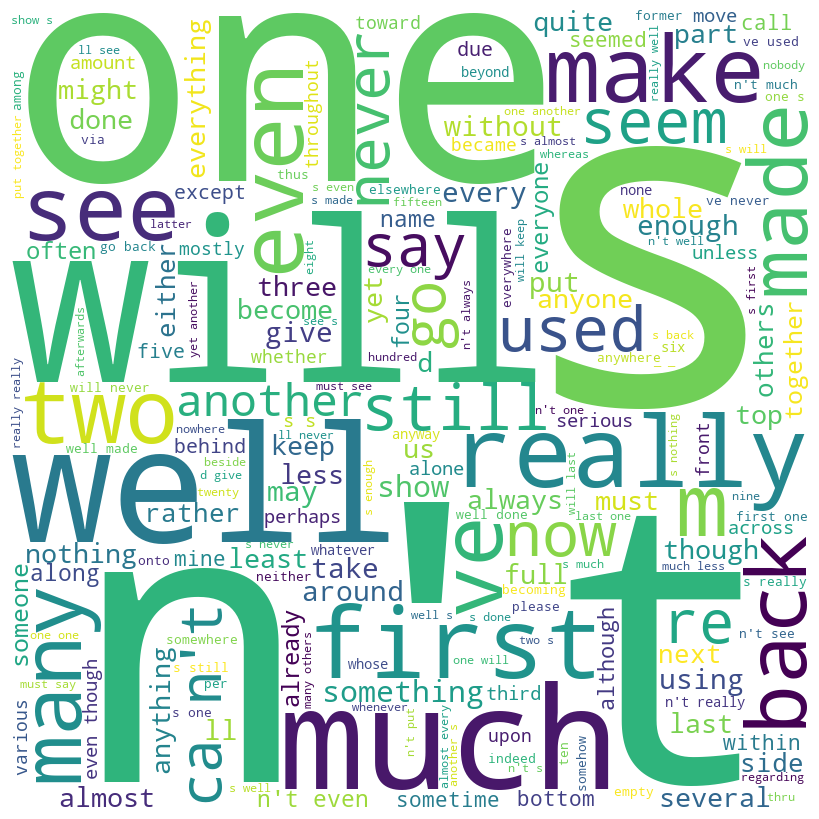

In [59]:
# word cloud for both of the vocabs
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sample text to create word cloud
text = "Python is an interpreted high-level programming language for general-purpose programming. \
Created by Guido van Rossum and first released in 1991, Python's design philosophy emphasizes \
code readability with its notable use of significant whitespace."

# Create WordCloud object
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', 
                min_font_size = 10).generate(" ".join(removed_text_list))

wordcloud1 = WordCloud(width = 800, height = 800, background_color ='white', 
                min_font_size = 10).generate(" ".join(added_vocab))

# Display the WordCloud                    
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Show plot
plt.show()

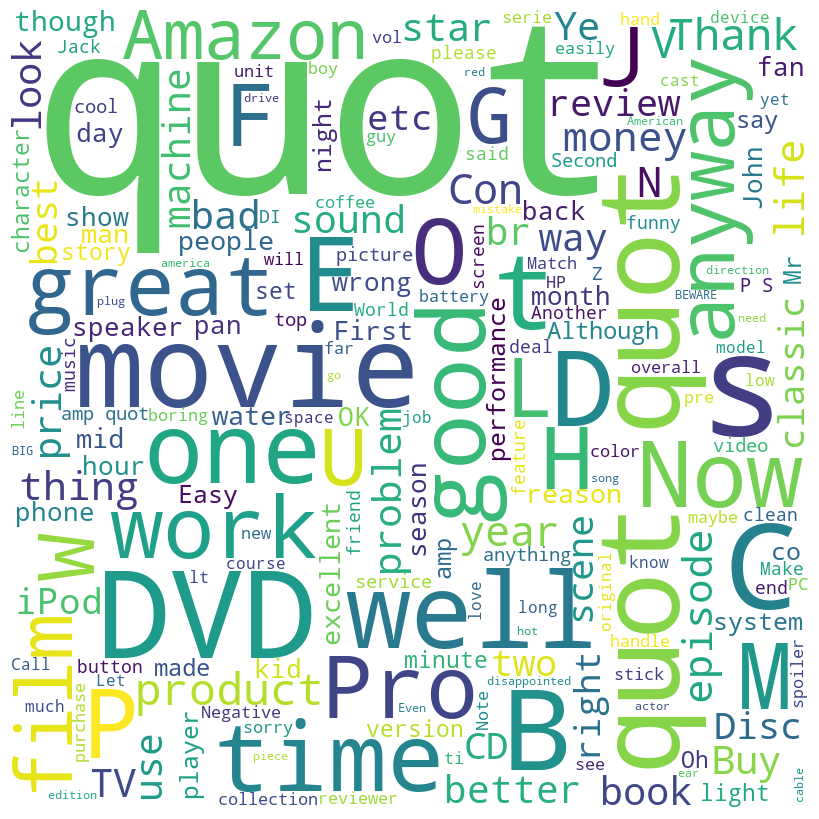

In [60]:
# Display the WordCloud                    
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud1) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Show plot
plt.show()

In [57]:
# removing stopping words
# reviews = final_df['<review_text>'].to_list()
# tokens_list = []
# for review in reviews:
#     tokens_list.append(nlp(review))
    

In [ ]:
# the traning could be done while taking the entities and removing the entities to detect in 
# which contexts the model performs better

### Transforming data into numerical using the tokenizer from the keras module

In [37]:


# transforming each tables
import numpy as np
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()

def tokenize_items(tokenizer, item_seq):
    tokenizer.fit_on_texts(item_seq)
    item_seq = tokenizer.texts_to_sequences(item_seq)
    return item_seq

In [38]:
reviews_list = tokenize_items(tokenizer, refined_list)

In [39]:
# since the reviews are not in homogeneous size we need to pad the sequence to make it homegeneous 
# we averaged the words count for this step, where it adds zero is the length of teh review are not of max_length=70
from keras.utils.data_utils import pad_sequences
reviews_list = pad_sequences(reviews_list, maxlen=max_length, truncating='pre')

In [40]:
vocab_size = len(tokenizer.word_counts)

In [41]:
# creating the numpy array
reviews_list = np.array(reviews_list)

In [42]:
# separating the label and the features
X = reviews_list
y = final_df['<outcome>']

In [43]:
# convert lable to numerical format as well
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [44]:
# create the numpy array 
y = np.array(y)

In [45]:
# create a two dimensional array 
from keras.utils import to_categorical
y = to_categorical(y)

In [372]:
y

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [46]:
# spliting the dataset into traning, testing and the evaluation set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=101)




In [47]:
X_test[1]

array([    1,     6,    89,   439,   991,  1083,   750,   485, 14454,
       11493,    34,    77,  3769,    47, 13775,  1569,    73, 18501,
         184,   171,     5,  1329,  2124,   256,    19,   661,     1,
       29842, 54471,   103,  1104,  4585,  2366,    62,    70,    31,
          59,   234,   107,    92,     1,    37,     1,   991,  3032,
         437,   458,   137,   606,     1,   778, 23455,   167,   616,
         991,  1569,   376,  3707,   606,  2048,   363,  4961, 54472,
        5402,  2948,   606,    45,   661,  3614,   384], dtype=int32)

# Making the Model Ready

In [51]:
# this model refers to the model class we developed which is model.py
from model import Model

In [52]:
# initialize and create the recurrent_model with 70 neuurons and 70 units of memory
model = Model(no_of_neurons=70, no_of_hidden_layers=2)
model.recurrent_model(vocab_size, 70, units=70)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 70, 70)            4365270   
                                                                 
 lstm_1 (LSTM)               (None, 70)                39480     
                                                                 
 dropout_1 (Dropout)         (None, 70)                0         
                                                                 
 dense_2 (Dense)             (None, 70)                4970      
                                                                 
 dense_3 (Dense)             (None, 2)                 142       
                                                                 
Total params: 4,409,862
Trainable params: 4,409,862
Non-trainable params: 0
_________________________________________________________________
None


In [53]:

# train the model
model.train_model(X_train, y_train, epochs=50, batch_size=50)


Epoch 1/50


2023-05-05 20:26:58.416009: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


358/358 - 18s - loss: 0.4842 - accuracy: 0.7600 - 18s/epoch - 51ms/step
Epoch 2/50
358/358 - 14s - loss: 0.2097 - accuracy: 0.9196 - 14s/epoch - 38ms/step
Epoch 3/50
358/358 - 12s - loss: 0.0873 - accuracy: 0.9699 - 12s/epoch - 34ms/step
Epoch 4/50
358/358 - 12s - loss: 0.0347 - accuracy: 0.9886 - 12s/epoch - 34ms/step
Epoch 5/50
358/358 - 12s - loss: 0.0242 - accuracy: 0.9932 - 12s/epoch - 35ms/step
Epoch 6/50
358/358 - 12s - loss: 0.0244 - accuracy: 0.9929 - 12s/epoch - 34ms/step
Epoch 7/50
358/358 - 13s - loss: 0.0234 - accuracy: 0.9928 - 13s/epoch - 36ms/step
Epoch 8/50
358/358 - 13s - loss: 0.0130 - accuracy: 0.9966 - 13s/epoch - 36ms/step
Epoch 9/50
358/358 - 13s - loss: 0.0054 - accuracy: 0.9984 - 13s/epoch - 36ms/step
Epoch 10/50
358/358 - 13s - loss: 0.0037 - accuracy: 0.9988 - 13s/epoch - 36ms/step
Epoch 11/50
358/358 - 13s - loss: 0.0087 - accuracy: 0.9978 - 13s/epoch - 37ms/step
Epoch 12/50
358/358 - 13s - loss: 0.0090 - accuracy: 0.9976 - 13s/epoch - 36ms/step
Epoch 13/50


In [50]:
model.save_model()

In [54]:
model.evaluate_model(X_val, y_val)

140/140 - 3s - loss: 3.3269 - accuracy: 0.7985 - 3s/epoch - 20ms/step


In [55]:
predictions = np.argmax(model.test_model(X_test), axis=1)
# np.argmax(model.predict(scaled_X_test),axis=1)

175/175 - 2s - 2s/epoch - 12ms/step


In [130]:
predictions

array([1, 1, 0, ..., 0, 1, 1])

In [56]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(classification_report(predictions, y_test.argmax(axis=1)))
# accuracy_score(predictions, y_test.argmax(axis=1))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      2809
           1       0.79      0.79      0.79      2773

    accuracy                           0.79      5582
   macro avg       0.79      0.79      0.79      5582
weighted avg       0.79      0.79      0.79      5582



In [142]:
# let's predict a review 
r_p = "got to say that one of the best product that i have ever brought in my home love it"
r_p = [r_p.split(" ")]
r_p = tokenize_items(tokenizer, r_p)
r_p = pad_sequences(r_p, maxlen=max_length, truncating='pre')

print(r_p)
n_g = "horribe product broken after few days"
n_g = [n_g.split(" ")]
n_g = tokenize_items(tokenizer, n_g)
print(n_g)
print(np.argmax(model.predict_review(r_p), axis=1))

# print(np.argmax(model.predict_review(n_g), axis=1))
# print()

[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0    30   200  5621   132   148   291     1    24    18
    132 19934   777  2063   949    45    42   137    16     2]]
[[4680, 18, 479, 85, 2852, 163]]
1/1 [==============================] - 0s 39ms/step
[1]


In [78]:
# removing stopping words
# i = 0
# list_ref = []
# for tokens in tokens_list:
#     tokens_ = [str(token) for token in tokens if token.text not in nlp.Defaults.stop_words]
#     if len(tokens) != len(tokens_):
#         # print(f"original ---> {len(tokens)} changed --> {len(tokens_)}")
#         i += 1
#     list_ref.append(tokens_)
# print(i)
    
    
# def make_spacy_doc(token_list):
#     return nlp.make_doc(' '.join(token_list))


# tokens_list_ref = []
# for tokens in list_ref:
#     tokens_list_ref.append(make_spacy_doc)

# for sentence in tokens_list_ref[0].sents:
#     print(sentence)


# for word in reviews[6].split(' '):
#         if word in nlp.Defaults.stop_words:
#             print(word)

7959


In [ ]:
# # truncate the ':electronics' from the product name column values
# df_positive['<product_name>'] = df_positive['<product_name>'].str.partition(":")[0]

# #working with the unique id and the reviewer
# df_positive['<unique_id>'][98]

# col = final_df.columns.to_list()
# col = col[:-1]
# print(col)

In [ ]:
# # split the data
# train_data,test_data,validate_data = final_df.randomSplit([0.7, 0.15, 0.15], seed=50)
# train_data.persist()
# test_data.persist()
# validate_data.persist()
# print("Number of records for training data : {}".format(train_data.count()) + " rows")
# print("Number of records for test data : {}".format(test_data.count()) + " rows")
# print("Number of records for test data : {}".format(validate_data.count()) + " rows")

In [ ]:
# filtered_reviews = []
# for review_text in reviews_text:
#     sentence = pick_words(review_text, 138)
#     filtered_reviews.append(sentence)
# print(filtered_reviews)
# #convert to dataframe
# filtered_reviews = pd.DataFrame(filtered_reviews, columns=["<review_text"])
# df_positive['<review_text>'] =  filtered_reviews

# text = df_positive['<review_text>']

# def words_count(sentence):
#     """
#     This function takes a sentence and a desired number of words as input
#     and returns a string containing only the specified number of words.
#     """
#     words = sentence.split()
#     # print(len(words))
#     return len(words)


# for t in text:
#     if words_count(t) > 138:
#         print('greater')

# df_positive.columns

# df_positive['<outcome>'] = 'positive'
# df_negative['<outcome>'] = 'negative'

# review_text
# ratings
# title
# helpful

# columns_to_include = ["<review_text>", "<rating>", "<title>"]
# df_positive_new = df_positive[['<review_text>', '<rating>', '<title>', '<outcome>']]

# # data_frame for the the postivie reviews
# df_positive_new.isna().sum()

# data frame for the negative reviews
# neg_reviews = df_negative['<review_text>']
# fil_neg_review = []

# for text in neg_reviews:
#     sentence = pick_words(text, 138)
#     fil_neg_review.append(sentence)
    
# df_negative['<review_text>'] = pd.DataFrame(filtered_reviews, columns=["<review_text"])


# rev  = df_negative['<review_text>']
# for r in rev:
#     print(words_count(r))


# df_negative_new = df_negative[['<review_text>', '<rating>', '<title>', '<outcome>']]

# # adding the table outcome to the both dataframe
# outcome = []
# for i in range(len(df_positive_new)):
#     outcome.append('positive')



['I purchased this unit due to frequent blackouts in my area and 2 power supplies going bad. It will run my cable modem, router, PC, and LCD monitor for 5 minutes. This is more than enough time to save work and shut down. Equally important, I know that my electronics are receiving clean power.I feel that this investment is minor compared to the loss of valuable data or the failure of equipment due to a power spike or an irregular power supply.As always, Amazon had it to me in &lt;2 business days', "I ordered 3 APC Back-UPS ES 500s on the recommendation of an employee of mine who used to work at APC. I've had them for about a month now without any problems. They've functioned properly through a few unexpected power interruptions. I'll gladly order more if the need arises.Pros: - Large plug spacing, good for power adapters - Simple design - Long cordCons: - No line conditioning (usually an expensive option", "Wish the unit had a separate online/offline light. When power to the unit is mi